In [1]:
%load_ext pycodestyle_magic

In [2]:
%flake8_on

In [3]:
import requests

URL = "https://www.wikidata.org/w/api.php"

participant_page = "Wikidata:WikiProject_COVID-19/Participants"

PARAMS = {
        "action": "query",
        "prop": "revisions",
        "titles": participant_page,
        "rvprop": "timestamp|user",
        "rvslots": "main",
        "rvlimit": "200",
        "formatversion": "2",
        "format": "json"
    }

S = requests.Session()
R = S.get(url=URL, params=PARAMS)
DATA = R.json()
PAGES = DATA["query"]["pages"]


In [4]:
import pandas as pd

project_users = pd.json_normalize(PAGES[0]['revisions'])

In [8]:
list_of_users = project_users.drop_duplicates('user')["user"]

In [47]:
def get_text_from_wikidata_user_page(username):
    print(username)
    S = requests.Session()
    URL = "https://www.wikidata.org/w/api.php"
    page = "User:" + username
    PARAMS = {
        "action": "parse",
        "page": page,
        "format": "json"
    }
    try:
        R = S.get(url=URL, params=PARAMS)
        DATA = R.json()
        return(DATA["parse"]["text"]["*"])
    except:
        return("")
    

user_descriptions = [get_text_from_wikidata_user_page(user) for user in list_of_users]

LaMèreVeille
Julian leonardo paez
Sj
EricaAzzellini
Daniel Mietchen
Ecritures
Rich Farmbrough
Hannolans
AntoineLogean
Ranjithsiji
Will (Wiki Ed)
Alejgh
JoranL
Higa4
AlexanderPico
Jelabra
Librarian lena
NandanaM
Addshore
2601:196:4601:1BD0:D191:200C:7F1F:9B7
So9q
90.129.216.20
Jjkoehorst
Gnoeee
OAnick
Csisc
Yupik
Mlemusrojas
Susannaanas
Evolution and evolvability
SCIdude
Skim
Fnielsen
Joalpe
Kwj2772
Denny
Titodutta
Petermr
Pigsonthewing
Nehaoua
Egon Willighagen
TJMSmith
Bluerasberry
Whidou
Andrawaag
Salgo60
KlaudiuMihaila
Jsamwrites
Neo-Jay
Bodhisattwa
Netha Hussain
Konrad Foerstner
Dhx1
Chchowmein
Jodi.a.schneider
TiagoLubiana


15:5: E722 do not use bare 'except'
17:1: W293 blank line contains whitespace


In [48]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


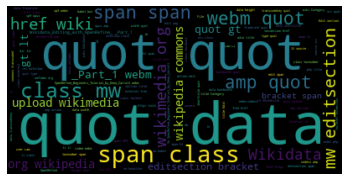

In [49]:
# Start with one review:
text = user_descriptions[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Suboptimal, as thsi is mostly html tags. 

In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lubianat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
3:1: E402 module level import not at top of file


In [51]:
import re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

import nltk

def tokenize_properly(sentence):
    tokens = nltk.regexp_tokenize(sentence, pattern=r"\s|[\.,;']", gaps=True)
    return(tokens)

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text
    text = REPLACE_BY_SPACE_RE.sub(r' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(r'', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    tokens = tokenize_properly(text)
    tokens_without_sw = [word for word in tokens if not word in STOPWORDS]
    text = " ".join(tokens_without_sw)
    return text

3:41: W605 invalid escape sequence '\['
3:43: W605 invalid escape sequence '\]'
3:45: W605 invalid escape sequence '\|'
7:1: E402 module level import not at top of file
9:1: E302 expected 2 blank lines, found 1
13:1: E302 expected 2 blank lines, found 1
16:1: W293 blank line contains whitespace
19:24: E261 at least two spaces before inline comment
20:47: E261 at least two spaces before inline comment
20:80: E501 line too long (101 > 79 characters)
21:41: E261 at least two spaces before inline comment
21:80: E501 line too long (95 > 79 characters)
23:53: E713 test for membership should be 'not in'


In [76]:
cleaned_user_descriptions = [text_prepare(text) for text in user_descriptions]

In [77]:
tokenized_descriptions = [tokenize_properly(text) for text in cleaned_user_descriptions]

tokenized_descriptions =  [x for x in tokenized_descriptions if x != []]

1:80: E501 line too long (88 > 79 characters)
3:25: E222 multiple spaces after operator


In [78]:
words_in_all = set(tokenized_descriptions[0]).intersection(*tokenized_descriptions[:])

In [82]:
def remove_stopword(text_tokens, stopwords):
    [word for word in text_tokens if not word in stopwords]

tokenized_descriptions_without_sw = [remove_stopword(text_tokens, words_in_all) for text_tokens in tokenized_descriptions] 

2:38: E713 test for membership should be 'not in'
4:1: E305 expected 2 blank lines after class or function definition, found 1


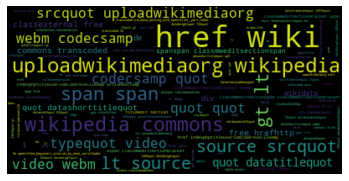

In [91]:
# Start with one review:
text = " ".join(tokenized_descriptions[0])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[['div',
  'classmwparseroutputtable',
  'classmwbabelwrappertbodytrth',
  'classmwbabelheadera',
  'href',
  'wiki',
  'wikidatababel',
  'classmwredirect',
  'titlewikidatababelbabel',
  'user',
  'information',
  'th',
  'trtrtddiv',
  'classmwbabelbox',
  'mwbabelboxn',
  'dirltrtabletbodytrth',
  'dirltrfrspan',
  'classmwbabelboxlevelnn',
  'span',
  'thtd',
  'dirltr',
  'langfrcette',
  'utilisatrice',
  'pour',
  'href',
  'wiki',
  'categoryuser_frn',
  'titlecategoryuser',
  'frnlangue',
  'maternelle',
  'le',
  'href',
  'wiki',
  'categoryuser_fr',
  'titlecategoryuser',
  'frfranais',
  'td',
  'tr',
  'tbody',
  'table',
  'divdiv',
  'classmwbabelbox',
  'mwbabelbox3',
  'dirltrtabletbodytrth',
  'dirltrenspan',
  'classmwbabelboxlevel33',
  'span',
  'thtd',
  'dirltr',
  'langenthis',
  'user',
  'href',
  'wiki',
  'categoryuser_en3',
  'titlecategoryuser',
  'en3advanced',
  'knowledge',
  'href',
  'wiki',
  'categoryuser_en',
  'titlecategoryuser',
  'enenglish',

In [87]:
text